<a href="https://colab.research.google.com/github/TylerSzymkowicz/TylerSzymkowicz/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install kmodes
from kmodes.kmodes import KModes

In [9]:
df=pd.read_csv('../Bakery.csv')
# df=pd.read_csv('Bakery.csv')

# Just change the comment if you need to load the data again


df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 9:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [11]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

# **Market Basket Analysis for Bakery Items**

In [12]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [13]:
dfti.TransactionNo.groupby(dfti.Items)

So guys the below code doesnt change our dataframe. Its appearent when you look specifically at row 1 and 2 and also compare The above dfti.head() with the below dfti.head() something like this "dfti = pd.DataFrame(dfti.TransactionNo.groupby(dfti.Items))" would be effective, but this puts the df into a totally difffent format. 

In [14]:
#dfti=pd.get_dummies(dfti,drop_first=True)
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [17]:
items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [18]:
all_items=[i for item in items for i in item]
#all_items


In [19]:
from collections import Counter

In [20]:
item_frequencies=Counter(all_items)
#item_frequencies

In [21]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [22]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


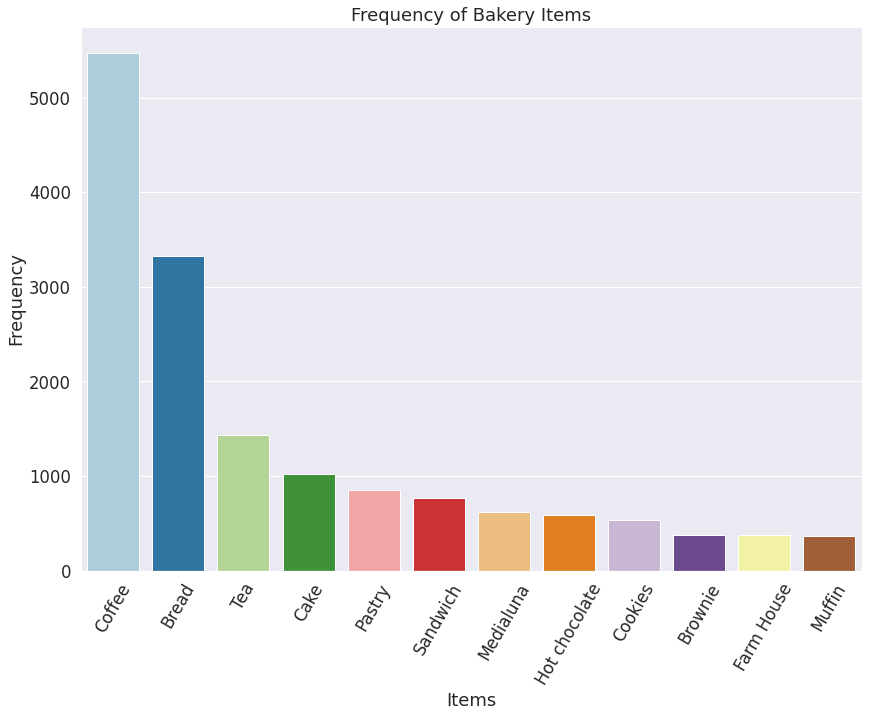

In [26]:
sns.barplot(item[0:12],itemfreqs[0:12])
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.show()

So the below x lable is "Book" and there is title, so i fixxed that. And made it look nicer. I wont delete anyones code. But also as a standard we should use Titles for all visuals. 

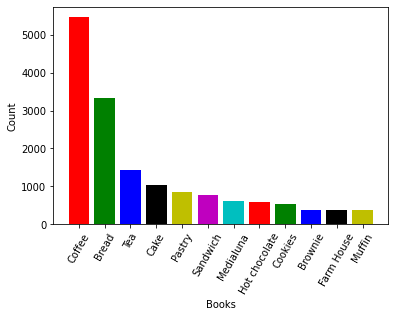

In [ ]:
plt.bar(height = itemfreqs[0:12], x = list(range(0, 12)), color = list('rgbkymc'))
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

# **Association Rule**

In [27]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [28]:
item_series.columns=["transactions"]

In [29]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

# currious why we make a copy of the df_dummy dateframe here?

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [31]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

In [32]:
labels = frequent_itemsets.itemsets[0:11]
labels

6            (Coffee)
2             (Bread)
26              (Tea)
4              (Cake)
34    (Coffee, Bread)
19           (Pastry)
21         (Sandwich)
16        (Medialuna)
12    (Hot chocolate)
42     (Cake, Coffee)
8           (Cookies)
Name: itemsets, dtype: object

In [33]:
formattedLabels = []
for i in labels:
  i = str(i)
  # print(i[12:-3])
  formattedLabels.append(i[12:-3])

In [34]:
formattedLabels

['Coffee',
 'Bread',
 'Tea',
 'Cake',
 "Coffee', 'Bread",
 'Pastry',
 'Sandwich',
 'Medialuna',
 'Hot chocolate',
 "Cake', 'Coffee",
 'Cookies']

In [35]:
frequent_itemsets.support[0:11]

6     0.478394
2     0.327205
26    0.142631
4     0.103856
34    0.090016
19    0.086107
21    0.071844
16    0.061807
12    0.058320
42    0.054728
8     0.054411
Name: support, dtype: float64

In [36]:
frequent_itemsets.itemsets[0:11]

6            (Coffee)
2             (Bread)
26              (Tea)
4              (Cake)
34    (Coffee, Bread)
19           (Pastry)
21         (Sandwich)
16        (Medialuna)
12    (Hot chocolate)
42     (Cake, Coffee)
8           (Cookies)
Name: itemsets, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


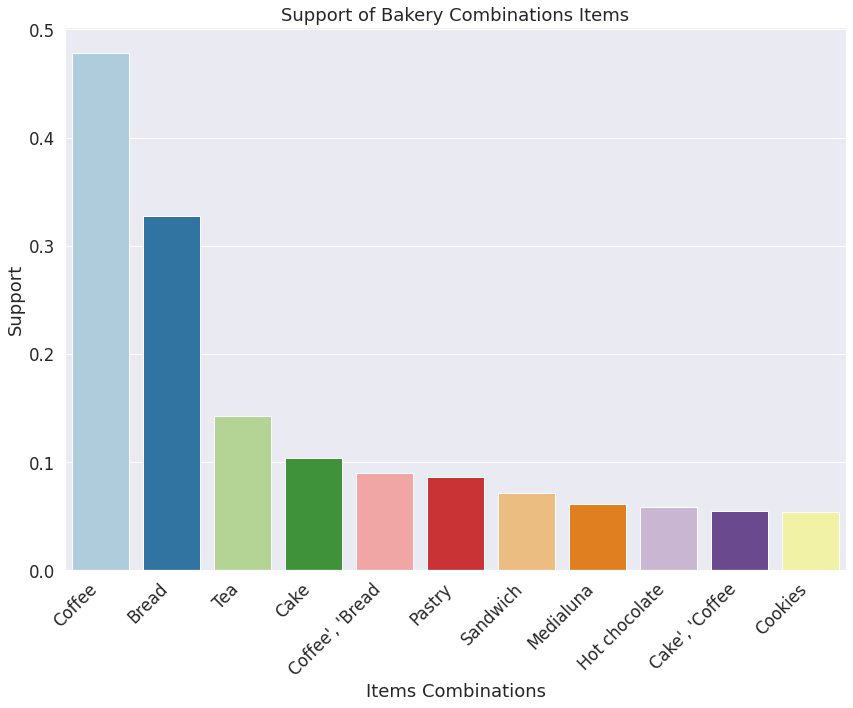

In [37]:
sns.barplot(formattedLabels,frequent_itemsets.support[0:11])
plt.title("Support of Bakery Combinations Items")
plt.xlabel("Items Combinations")
plt.ylabel("Support")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 11), ), formattedLabels, rotation=45, ha = "right")
plt.show()

So just again used seaborn to make this visual nicer. I also added the title and got rid of the "frozenset" befor the label... hope that is alright with whoever made the below visual

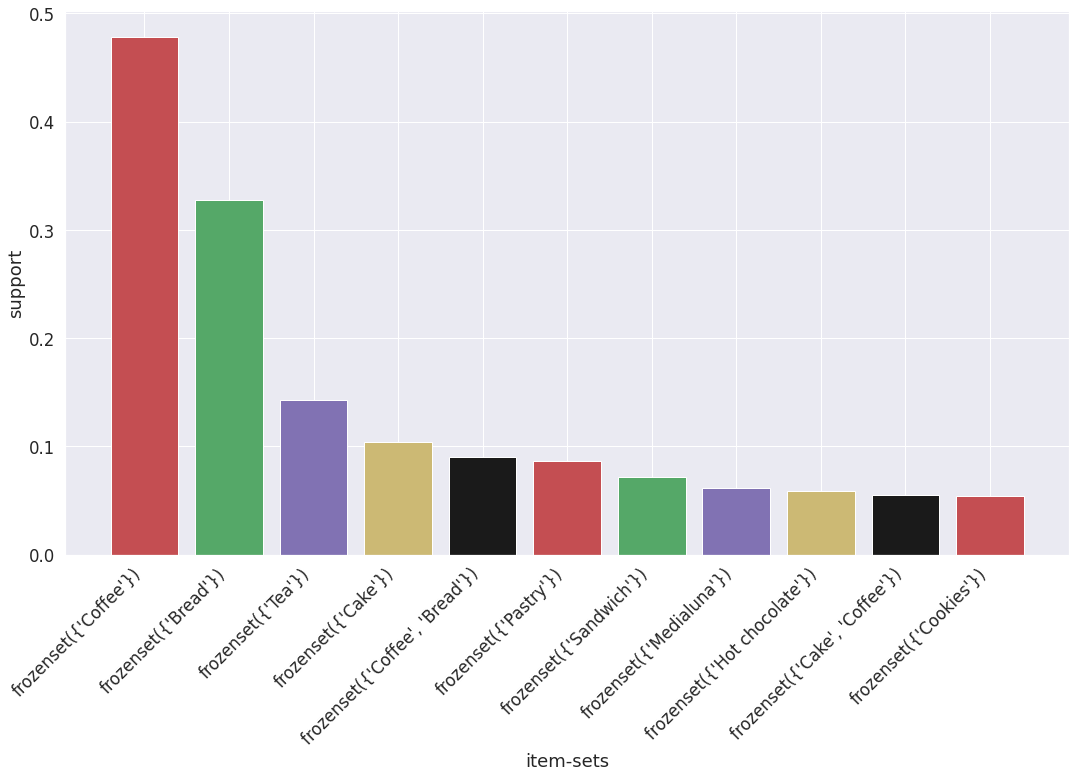

In [38]:
# fig, ax = plt.subplots(1)
plt.figure(figsize=(18, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45, ha="right")
plt.xlabel('item-sets')
plt.ylabel('support')
# ax.set_xlabel(formattedLabels, fontweight ='bold')
plt.show()

In [39]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
30,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
31,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
17,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
16,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
33,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
32,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


So I know we use lift a metric here to find high relations but do we say "Cake has the highest assocation with Coffee and Tea". or somthing like "Coffee and Tea are most often bought with Cake"

In [41]:
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [42]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 9:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


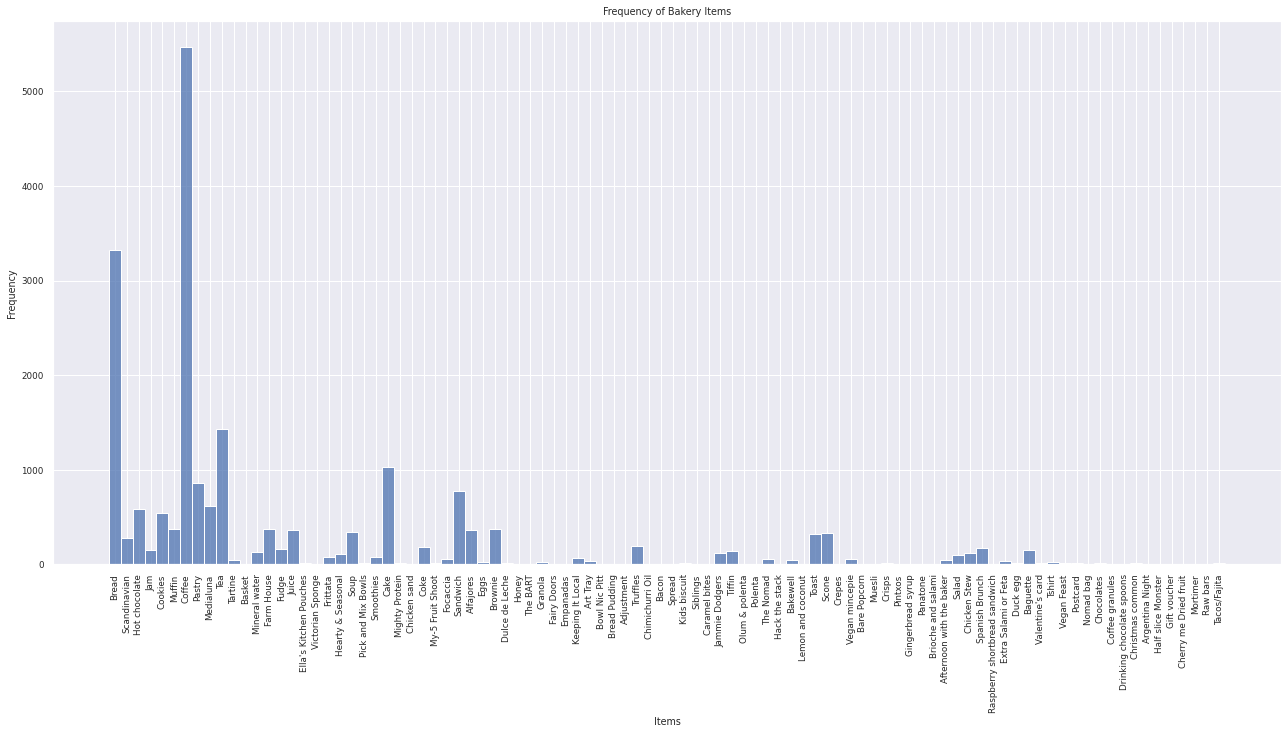

In [46]:
sns.histplot(df.Items)
sns.set(rc = {'figure.figsize':(22,10)}, font_scale = 0.8)
plt.xticks(list(range(0, len(pd.unique(df.Items))), ), rotation=90, ha = "center")
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()

In [44]:
df.Items.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

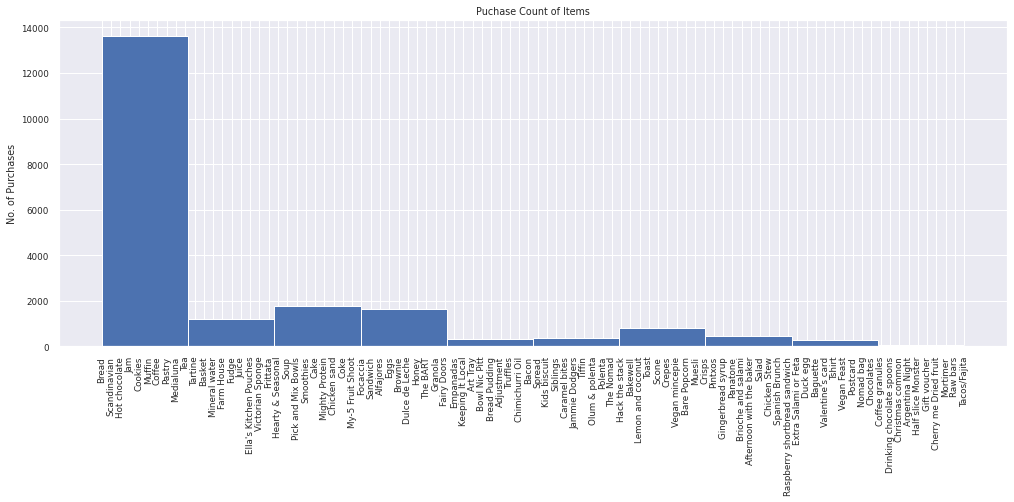

In [45]:
plt.figure(figsize = (17, 6))
plt.hist(df.Items)

plt.ylabel("No. of Purchases")
plt.title('Puchase Count of Items')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
df.DayType.value_counts()

Weekday    12807
Weekend     7700
Name: DayType, dtype: int64

In [ ]:
print(7700 + 12807)
print(7700/20507)
print(12807/20507)

20507
0.3754815428877944
0.6245184571122055


[]

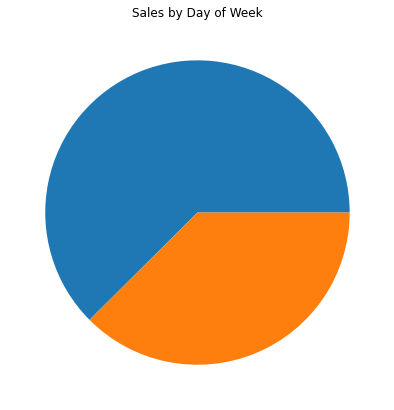

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.pie(df.DayType.value_counts())
plt.title('Sales by Day of Week')
plt.plot()

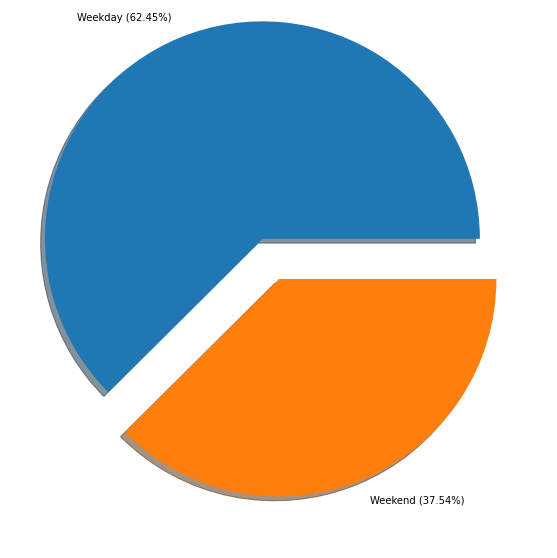

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([62.45, 37.54])
mylabels = ["Weekday (62.45%)", "Weekend (37.54%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

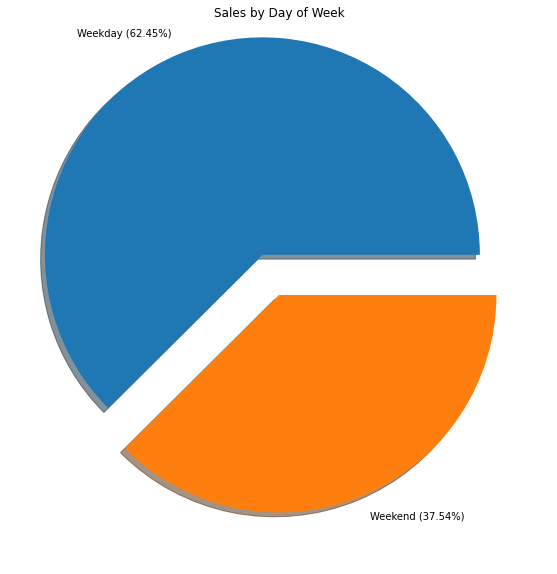

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([62.45, 37.54])
mylabels = ["Weekday (62.45%)", "Weekend (37.54%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Day of Week')
plt.show()

In [ ]:
print(7700 + 12807)
print((7700/20507)/2)
print((12807/20507)/5)

20507
0.1877407714438972
0.12490369142244111


In [ ]:
print(0.1877407714+0.12490369)

0.3126444614


In [ ]:
print(0.18774077/0.31264446)
print(0.1249036914/0.3126444614)

0.6004928729586316
0.39950712973033337


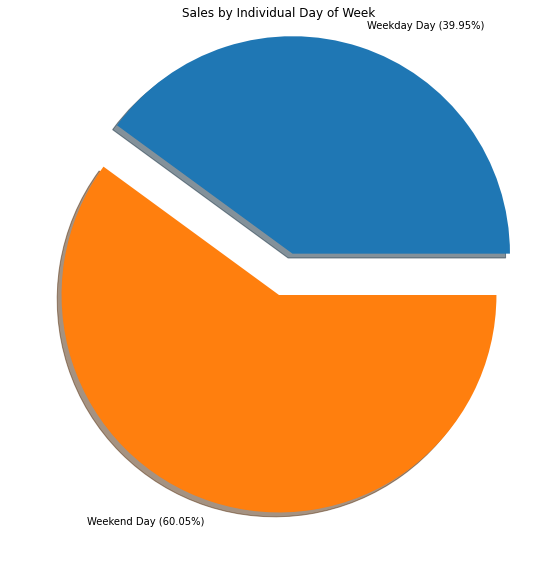

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([39.95, 60.05])
mylabels = ["Weekday Day (39.95%)", "Weekend Day (60.05%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Individual Day of Week')
plt.show()

In [ ]:
df.Daypart.value_counts()

Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Daypart, dtype: int64

Text(0.5, 1.0, 'Sales by Time of Day')

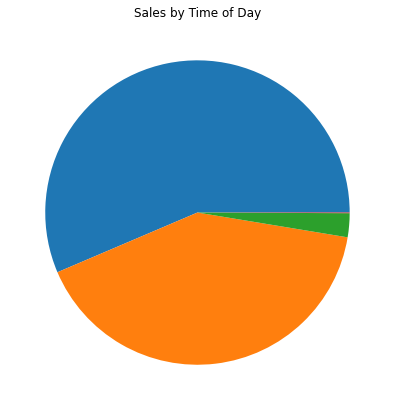

In [ ]:

fig = plt.figure(figsize = (10, 7))
plt.pie(df.Daypart.value_counts())
plt.plot()
plt.title('Sales by Time of Day')

In [ ]:
11569 + 8404 + 520 + 14

20507

In [ ]:
print(11569 + 8404 + 520 + 14)
print('Afternoon Proportion =', 11569/20507)
print('Morning Proportion =', 8404/20507)
print('Evening Proportion =', 520/20507)
print('Night Proportion =', 14/20507)

20507
Afternoon Proportion = 0.5641488272297265
Morning Proportion = 0.4098112839518213
Evening Proportion = 0.025357195104110792
Night Proportion = 0.0006826937143414443


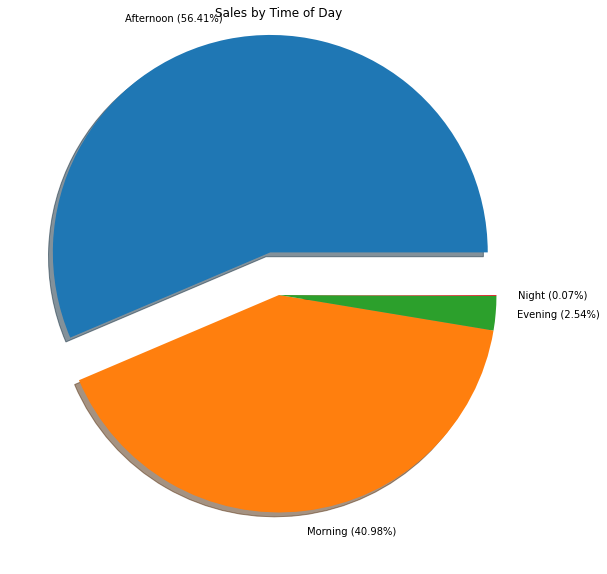

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([56.41, 40.98, 2.54, 0.07])
mylabels = ["Afternoon (56.41%)", "Morning (40.98%)", "Evening (2.54%)", "Night (0.07%)"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Time of Day')
plt.show()

In [ ]:
print(df.columns.tolist())

df.Items.value_counts().tolist()

['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType']


[5471,
 3325,
 1435,
 1025,
 856,
 771,
 616,
 590,
 540,
 379,
 374,
 370,
 369,
 369,
 342,
 327,
 318,
 277,
 193,
 185,
 172,
 159,
 152,
 149,
 146,
 136,
 125,
 123,
 107,
 99,
 81,
 77,
 63,
 58,
 54,
 54,
 48,
 47,
 44,
 38,
 38,
 28,
 28,
 21,
 18,
 17,
 16,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
df.Items.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [ ]:
df.Items.value_counts().sum()

20507

In [ ]:
print('Coffee Proportion =', 5471/20507)
print('Bread Proportion =', 3325/20507)
print('Tea Proportion =', 1435/20507)
print('Cake Proportion =', 1025/20507)
print('Pastry Proportion =', 856/20507)
print('Sandwich Proportion =', 771/20507)

Coffee Proportion = 0.26678695079728876
Bread Proportion = 0.16213975715609305
Tea Proportion = 0.06997610571999804
Cake Proportion = 0.04998293265714147
Pastry Proportion = 0.04174184424830546
Sandwich Proportion = 0.03759691812551812


[]

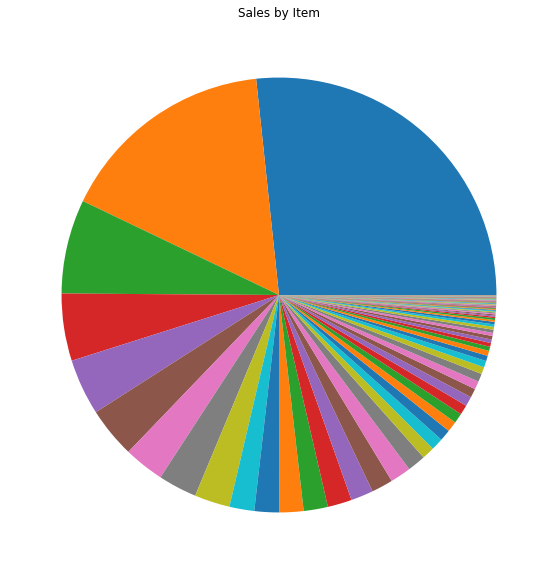

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.pie(df.Items.value_counts())
plt.title('Sales by Item')
plt.plot()

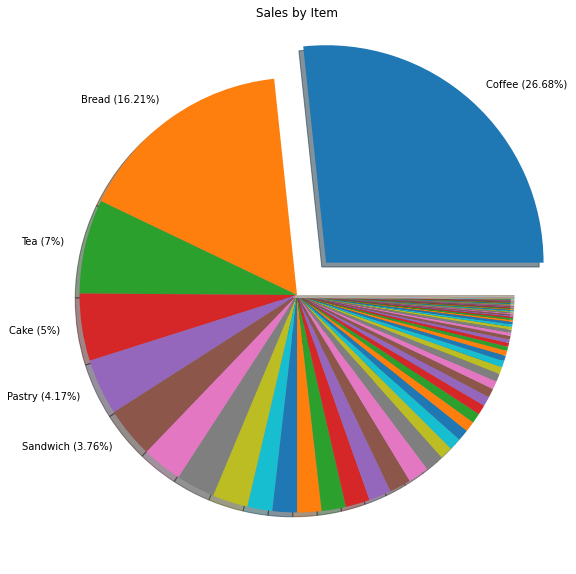

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.title('Sales by Item')

x = df.Items.value_counts()

# y = np.array([26.68, 16.21, 7, 5, 4.17, 3.76])
mylabels = ["Coffee (26.68%)", "Bread (16.21%)", "Tea (7%)", "Cake (5%)", "Pastry (4.17%)", "Sandwich (3.76%)",'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
myexplode = [0.2, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(x, labels = mylabels, explode = myexplode, shadow = True)

plt.show()

# EDA Insights: 

- 0. Weekdays are more profitable, with 60% of sales occurring on weekday days. 
- 1. Fewer that 1% of sales occur during the hours designated as night and only 2.5% during the hours designated as evening:
  - As inconvenient as it might be for the patrons (especially dedicated/ loyal night-time customers), NOT OPERATING DURING THESE HOURS would likely increase profits by decreasing the operational costs (employee salary/ wages, utilities, insurance premiums for operating a cash business during periods more prone to (potentially violent) robbery/ theft, *etc.*) to a degree that more than offsets and loss in sales revenue.
- 2. Folks love coffee, bread, tea, pastries, cakes, & sammiches:
  - INCREASING STOCK & VARIETY of such items might increase sales revenue; 
  - as might CREATING PROMOTIONAL OFFERS tailored to the sale of these items; this insight should dovetail w/ those from the Market-Basket Analysis.

In [ ]:
df.Items = df.Items.replace({'Bread': 0, 'Scandinavian': 1, 'Hot chocolate': 2, 'Jam': 3, 'Cookies': 4,
       'Muffin': 5, 'Coffee': 6, 'Pastry': 7, 'Medialuna': 8, 'Tea': 9, 'Tartine': 10,
       'Basket': 11, 'Mineral water': 12, 'Farm House': 13, 'Fudge': 14, 'Juice': 15,
       "Ella's Kitchen Pouches": 16, 'Victorian Sponge': 17, 'Frittata': 18,
       'Hearty & Seasonal': 19, 'Soup': 20, 'Pick and Mix Bowls': 21, 'Smoothies': 22,
       'Cake': 23, 'Mighty Protein': 24, 'Chicken sand': 25, 'Coke': 26,
       'My-5 Fruit Shoot': 27, 'Focaccia': 28, 'Sandwich': 29, 'Alfajores': 30, 'Eggs': 31,
       'Brownie': 32, 'Dulce de Leche': 33, 'Honey': 34, 'The BART': 35, 'Granola': 36,
       'Fairy Doors': 37, 'Empanadas': 38, 'Keeping It Local': 39, 'Art Tray': 40,
       'Bowl Nic Pitt': 41, 'Bread Pudding': 42, 'Adjustment': 43, 'Truffles': 44,
       'Chimichurri Oil': 45, 'Bacon': 46, 'Spread': 47, 'Kids biscuit': 48, 'Siblings': 49,
       'Caramel bites': 50, 'Jammie Dodgers': 51, 'Tiffin': 52, 'Olum & polenta': 53,
       'Polenta': 54, 'The Nomad': 55, 'Hack the stack': 56, 'Bakewell': 57,
       'Lemon and coconut': 58, 'Toast': 59, 'Scone': 60, 'Crepes': 61, 'Vegan mincepie': 62,
       'Bare Popcorn': 63, 'Muesli': 64, 'Crisps': 65, 'Pintxos': 66, 'Gingerbread syrup': 67,
       'Panatone': 68, 'Brioche and salami': 69, 'Afternoon with the baker': 70,
       'Salad': 71, 'Chicken Stew': 72, 'Spanish Brunch': 73,
       'Raspberry shortbread sandwich': 74, 'Extra Salami or Feta': 75,
       'Duck egg': 76, 'Baguette': 77, "Valentine's card": 78, 'Tshirt': 79,
       'Vegan Feast': 80, 'Postcard': 81, 'Nomad bag': 82, 'Chocolates': 83,
       'Coffee granules': 84, 'Drinking chocolate spoons': 85, 'Christmas common': 86,
       'Argentina Night': 87, 'Half slice Monster': 88, 'Gift voucher': 89,
       'Cherry me Dried fruit': 90, 'Mortimer': 91, 'Raw bars': 92, 'Tacos/Fajita': 93})

In [ ]:
df.Items.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       'Coffee granules ', 'Drinking chocolate spoons ', 86, 87,
       'Half slice Monster ', 89, 90, 91, 92, 93], dtype=object)

In [ ]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 09:58:11,Morning,Weekend
1,2,1,2016-10-30 10:05:34,Morning,Weekend
2,2,1,2016-10-30 10:05:34,Morning,Weekend
3,3,2,2016-10-30 10:07:57,Morning,Weekend
4,3,3,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,9,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,6,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,7,2017-09-04 14:57:06,Afternoon,Weekend


In [ ]:
df.Daypart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [ ]:
df.Daypart = df['Daypart'].replace({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [ ]:
df.Daypart.unique()

array([0, 1, 2, 3])

In [ ]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 09:58:11,0,Weekend
1,2,1,2016-10-30 10:05:34,0,Weekend
2,2,1,2016-10-30 10:05:34,0,Weekend
3,3,2,2016-10-30 10:07:57,0,Weekend
4,3,3,2016-10-30 10:07:57,0,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,Weekend
20503,9682,9,2017-09-04 14:32:58,1,Weekend
20504,9683,6,2017-09-04 14:57:06,1,Weekend
20505,9683,7,2017-09-04 14:57:06,1,Weekend


In [ ]:
df.DayType.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
df.DayType = df.DayType.replace({'Weekend': 0, 'Weekday': 1})

In [ ]:
df.DayType.unique()

array([0, 1])

In [ ]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 09:58:11,0,0
1,2,1,2016-10-30 10:05:34,0,0
2,2,1,2016-10-30 10:05:34,0,0
3,3,2,2016-10-30 10:07:57,0,0
4,3,3,2016-10-30 10:07:57,0,0
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,0
20503,9682,9,2017-09-04 14:32:58,1,0
20504,9683,6,2017-09-04 14:57:06,1,0
20505,9683,7,2017-09-04 14:57:06,1,0


In [ ]:
df.DateTime.unique()

array(['2016-10-30 09:58:11', '2016-10-30 10:05:34',
       '2016-10-30 10:07:57', ..., '2017-09-04 14:32:58',
       '2017-09-04 14:57:06', '2017-09-04 15:04:24'], dtype=object)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'] = df['DateTime'].dt.strftime('%Y')

# df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m')

In [ ]:
df.DateTime.unique()

array(['2016', '2017'], dtype=object)

In [ ]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016,0,0
1,2,1,2016,0,0
2,2,1,2016,0,0
3,3,2,2016,0,0
4,3,3,2016,0,0
...,...,...,...,...,...
20502,9682,6,2017,1,0
20503,9682,9,2017,1,0
20504,9683,6,2017,1,0
20505,9683,7,2017,1,0


In [ ]:
df.DateTime = pd.to_numeric(df.DateTime)

In [ ]:
df.rename(columns = {'DateTime': 'Year', 'Daypart': 'Morning:0, Afternoon:1, Evening:2, Night:3', 'DayType': 'Weekend:0, Weekday:1'}, inplace = True)

In [ ]:
df

,TransactionNo,Items,Year,"Morning:0, Afternoon:1, Evening:2, Night:3","Weekend:0, Weekday:1"
0,1,0,2016,0,0
1,2,1,2016,0,0
2,2,1,2016,0,0
3,3,2,2016,0,0
4,3,3,2016,0,0
...,...,...,...,...,...
20502,9682,6,2017,1,0
20503,9682,9,2017,1,0
20504,9683,6,2017,1,0
20505,9683,7,2017,1,0


In [ ]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [ ]:
item_series.columns=["transactions"]

In [ ]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [ ]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

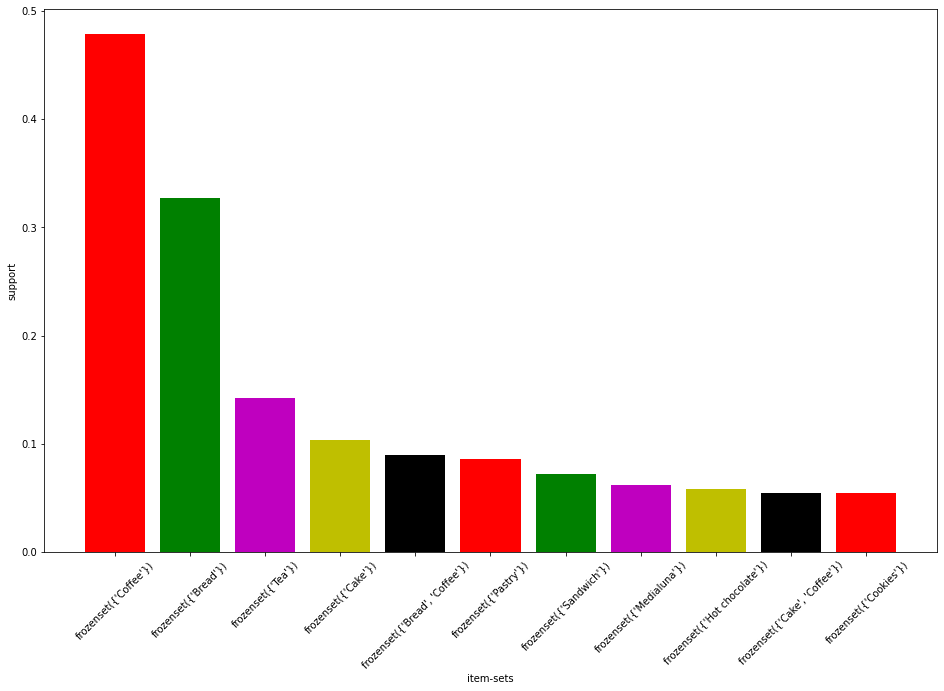

In [ ]:
plt.figure(figsize=(16, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [ ]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
30,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
31,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
17,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
16,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
33,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
32,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [ ]:
df=pd.read_csv('Bakery.csv')

In [ ]:

new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

,TransactionNo,Daypart,DayType
0,1,Morning,Weekend
1,2,Morning,Weekend
2,2,Morning,Weekend
3,3,Morning,Weekend
4,3,Morning,Weekend
...,...,...,...
20502,9682,Afternoon,Weekend
20503,9682,Afternoon,Weekend
20504,9683,Afternoon,Weekend
20505,9683,Afternoon,Weekend


In [ ]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
2,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
4,3,Morning,Weekend,Morning Weekend


In [ ]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [ ]:
df_drop = new_df.drop_duplicates()
df_drop

,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
6,4,Morning,Weekend,Morning Weekend
7,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
20495,9680,Afternoon,Weekend,Afternoon Weekend
20496,9681,Afternoon,Weekend,Afternoon Weekend
20500,9682,Afternoon,Weekend,Afternoon Weekend
20504,9683,Afternoon,Weekend,Afternoon Weekend


In [ ]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)



In [ ]:
df_drop = df_drop.reset_index(drop=True)

In [ ]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head()
#Dataframe for dummy variables and Daytype/DayType

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 25027.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1646, cost: 20178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3155, cost: 21055.0
Init: initializing centroids
Init: initializing clusters
Starting ite

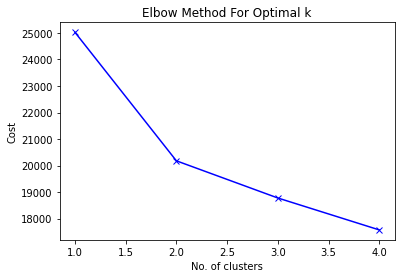

In [ ]:
# Elbow curve to find optimal K
data = df_dummy
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2571, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 968, cost: 20499.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 21055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1618, cost: 20178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 268, cost: 24701.0
Best run was number 4


array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
kmode.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(kmode.labels_)  # converting numpy array into pandas series object 
data['clust'] = mb # creating a  new column and assigning it to new column 

In [ ]:
data.groupby(data.clust).apply(pd.DataFrame.mode).reset_index(drop=True)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType,clust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Afternoon Weekday,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Morning Weekday,1


In [ ]:
data.groupby(data.clust).mean()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
clust,,,,,,,,,,,,,,,,,,,,,
0,0.000156,0.005765,0.040199,0.000935,0.005298,0.000156,0.015114,0.006232,0.000779,0.000779,...,0.000000,0.006544,0.017451,0.037395,0.023528,0.003116,0.001558,0.002493,0.006544,0.000623
1,0.000000,0.001969,0.028224,0.000328,0.001313,0.000000,0.018051,0.002626,0.000000,0.000328,...,0.000328,0.005251,0.011159,0.025599,0.013456,0.000328,0.000985,0.000000,0.003282,0.000985


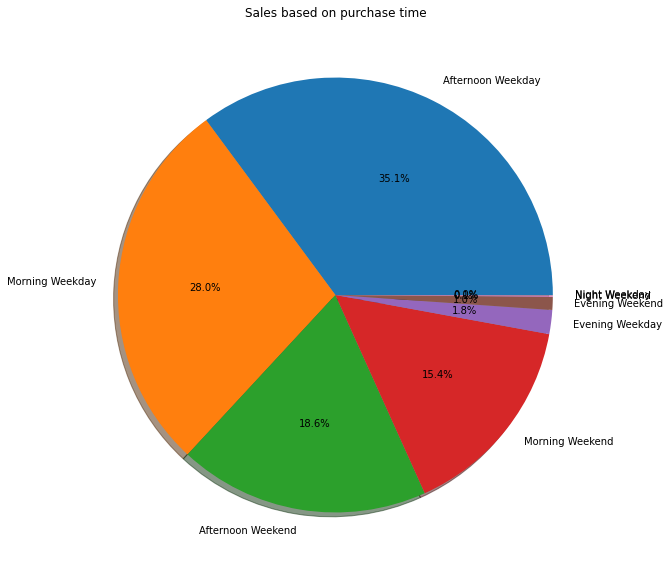

In [ ]:
fig = plt.figure(figsize = (10, 10))

label = ['Afternoon Weekday', 'Morning Weekday', 'Afternoon Weekend', 'Morning Weekend', 'Evening Weekday','Evening Weekend','Night Weekend','Night Weekday ']

plt.pie(df_dummy["PartType"].value_counts(), shadow = True,autopct='%1.1f%%',labels = label)
plt.title('Sales based on purchase time')
plt.show()

In [ ]:
df_dummy["PartType"].value_counts()

Afternoon Weekday    3325
Morning Weekday      2648
Afternoon Weekend    1764
Morning Weekend      1455
Evening Weekday       169
Evening Weekend        92
Night Weekend           9
Night Weekday           3
Name: PartType, dtype: int64